In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('application_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Removing nulls

In [3]:
#'Unnamed: 1' contains all nulls, it's a blank column which can be removed
df = df.drop(columns = ['Unnamed: 1'])

#there are 12 AMT_ANNUITY nulls which can be filled with the mean value
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(), inplace=True)

#there are 278 AMT_GOODS_PRICE nulls which can be filled with the mean value
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace=True)

#there are 1,292 NAME_TYPE_SUITE nulls which can be fill with the most common suite type
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

#the OWN_CAR_AGE column can be removed since there are 202,929 nulls (about 2/3 of the data) which wouldn't be helpful
df = df.drop(columns = ['OWN_CAR_AGE'])

#the OCCUPATION_TYPE column can be removed since there are 96,391 nulls (about 1/3 of the data) which wouldn't be helpful
df = df.drop(columns = ['OCCUPATION_TYPE'])

#there are 2 CNT_FAM_MEMBERS nulls which can be fill with the most common family count
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

## Removing outliers

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>],
       [<Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>,
        <Axes: title={'center': 'REG_REGION_NOT_WORK_REGION'}>,
    

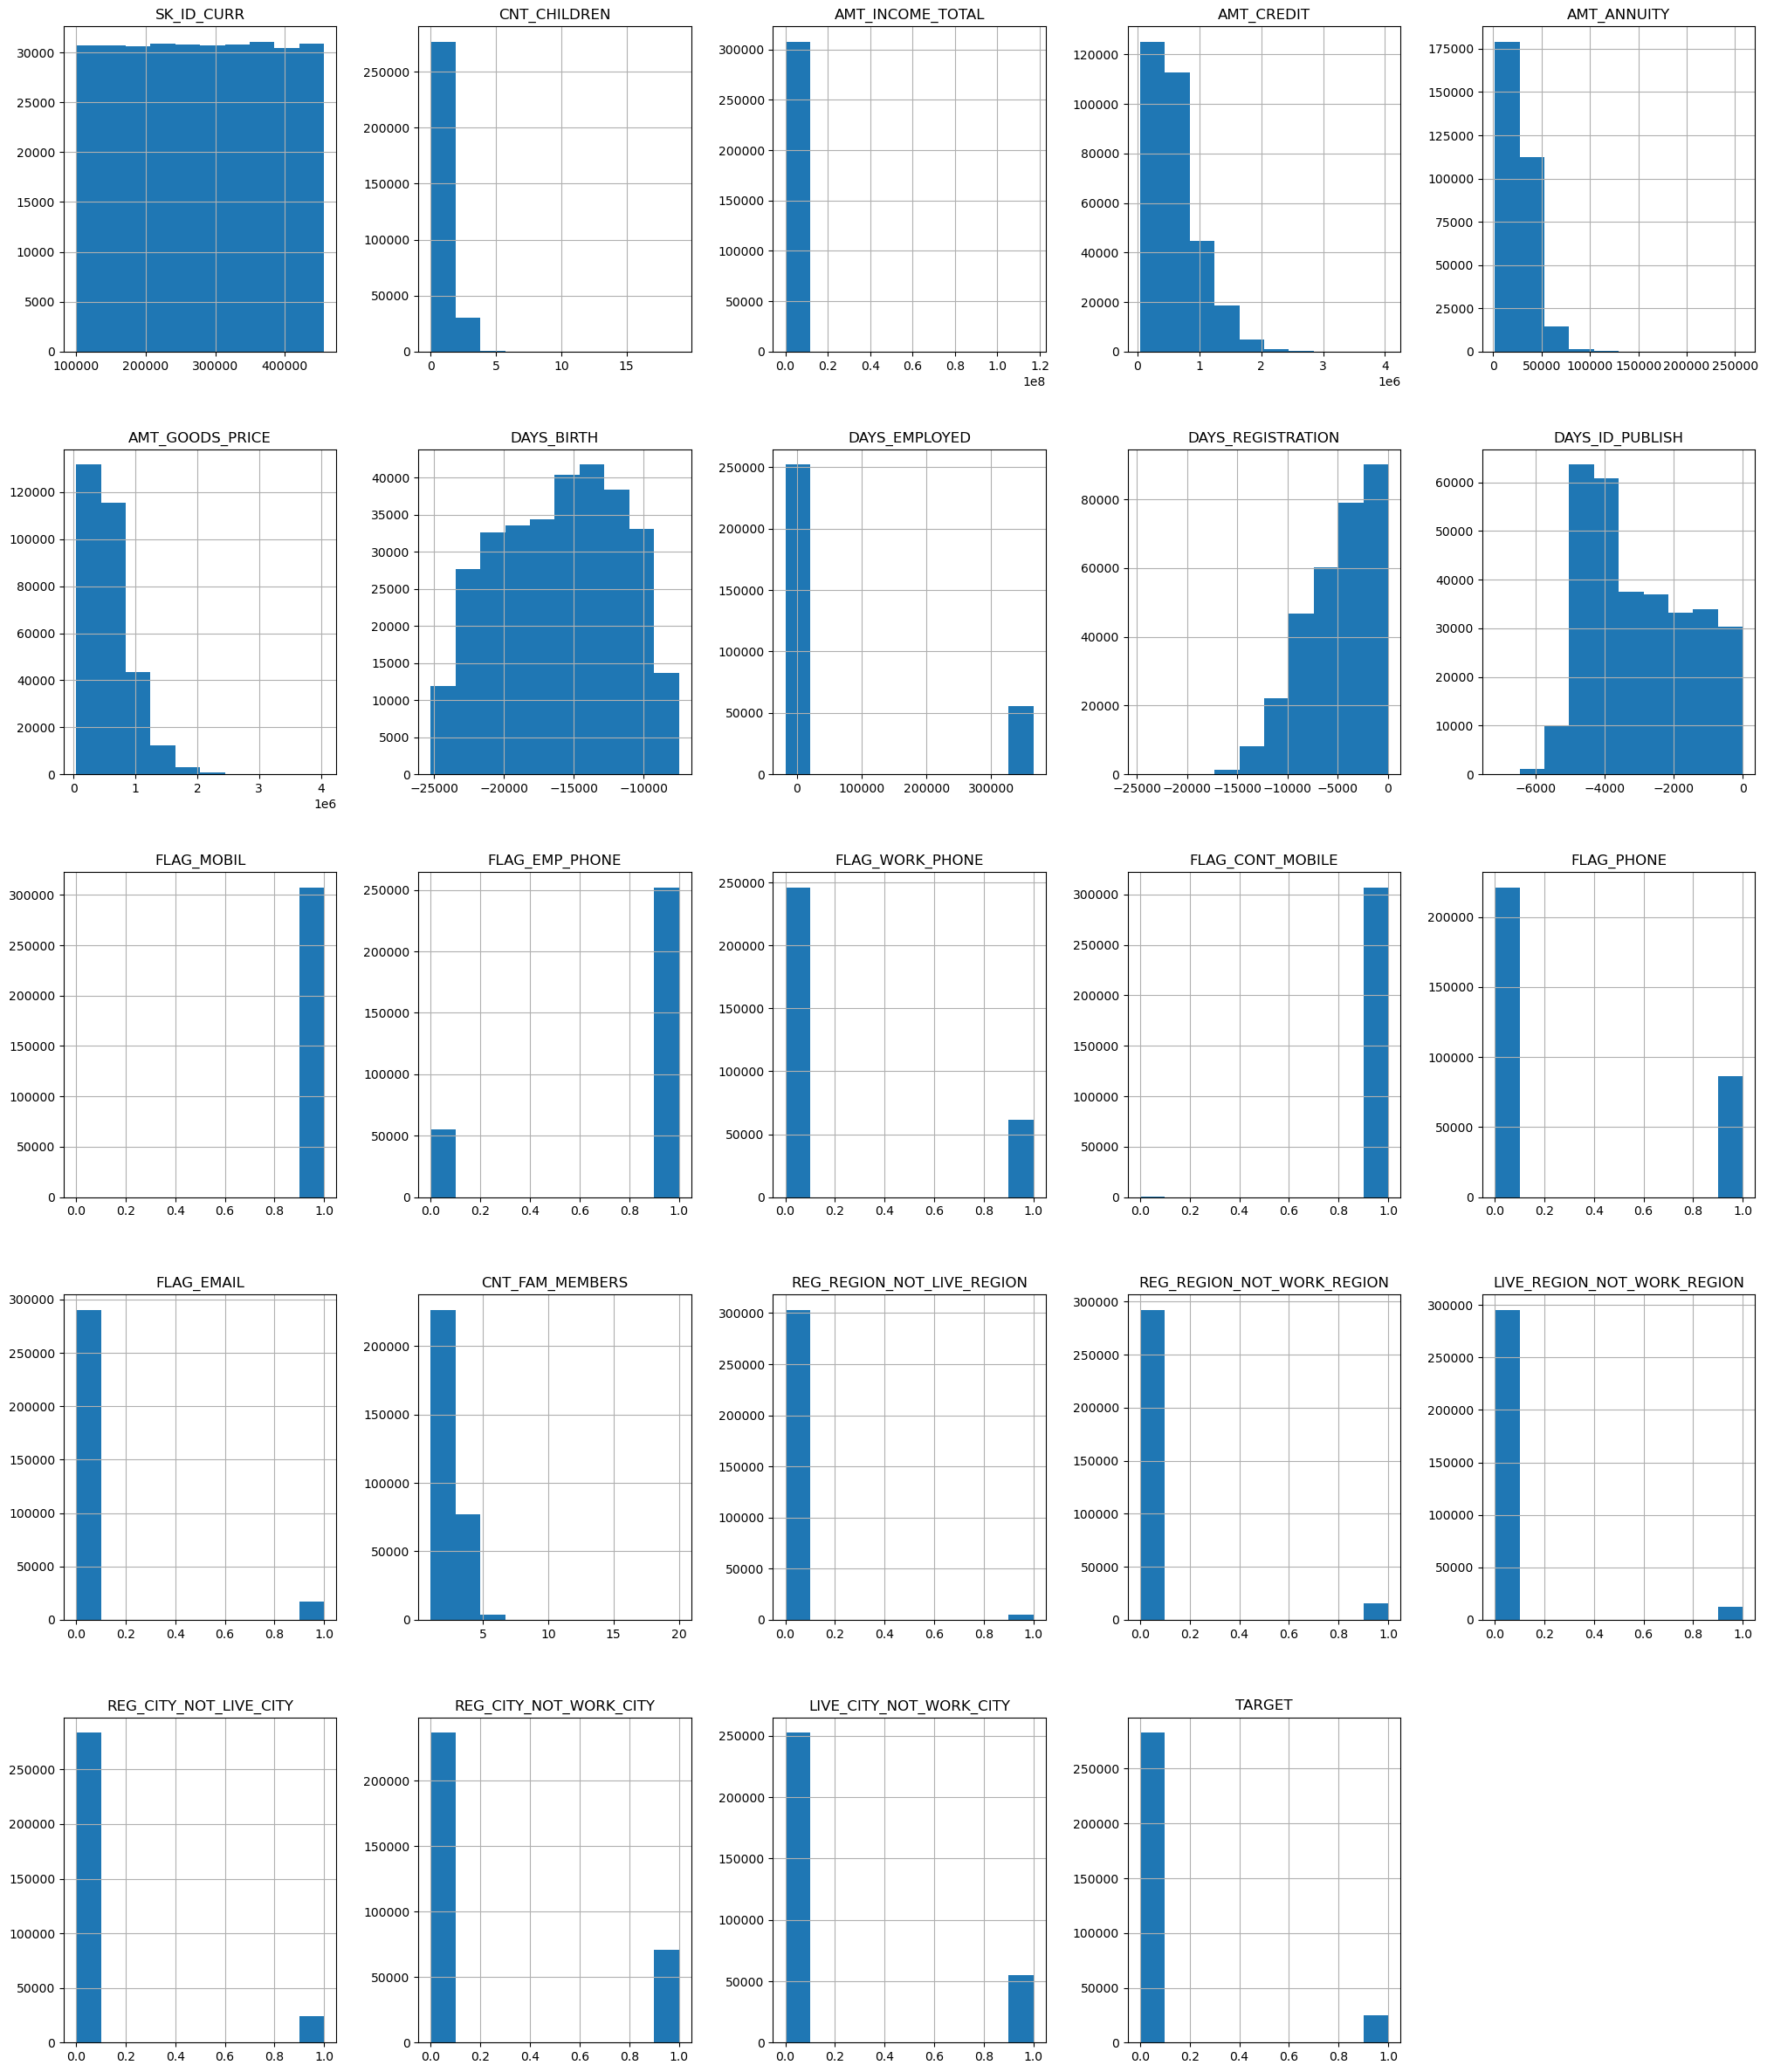

In [4]:
#look at the histogram for each data to see the distribution for outliers
df.hist(figsize=(25,30))

<Axes: >

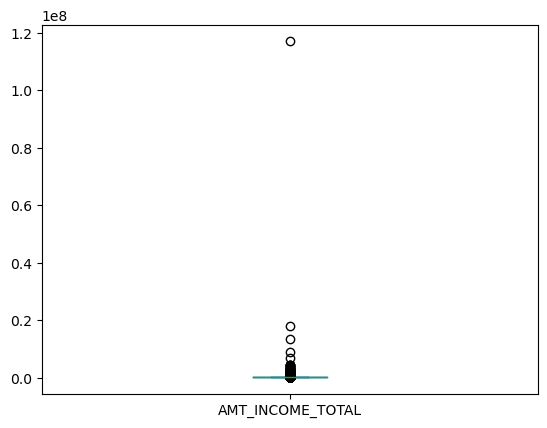

In [5]:
#use a box plot for AMT_INCOME_TOTAL to get a better view of outliers 
df['AMT_INCOME_TOTAL'].plot(kind='box')

<Axes: >

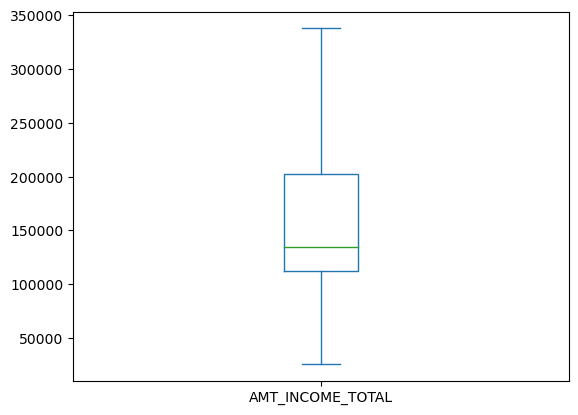

In [6]:
#find the IQR of AMT_INCOME_TOTAL to get the desired range of data
#set the lower and higher acceptable limits where anything outside is considered an outlier
#update the dataframe to only the non outliers

Q1_INCOME = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3_INCOME = df['AMT_INCOME_TOTAL'].quantile(0.75)

IQR_INCOME = Q3_INCOME - Q1_INCOME

below_INCOME = Q1_INCOME - 1.5 * IQR_INCOME
above_INCOME = Q3_INCOME + 1.5 * IQR_INCOME

df = df.loc[(df['AMT_INCOME_TOTAL'] >= below_INCOME) & (df['AMT_INCOME_TOTAL'] <= above_INCOME)] 
df['AMT_INCOME_TOTAL'].plot(kind='box')

<Axes: >

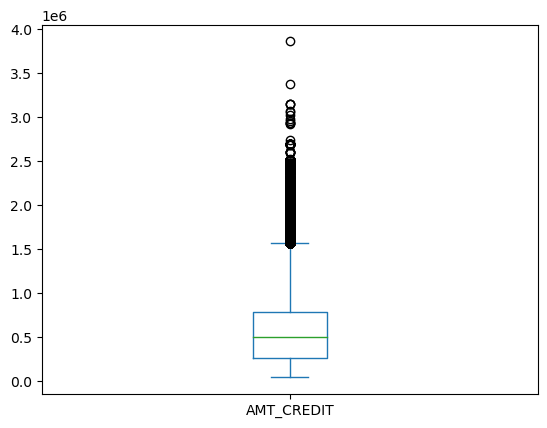

In [7]:
#use a box plot for AMT_CREDIT to get a better view of outliers 
df['AMT_CREDIT'].plot(kind='box')

<Axes: >

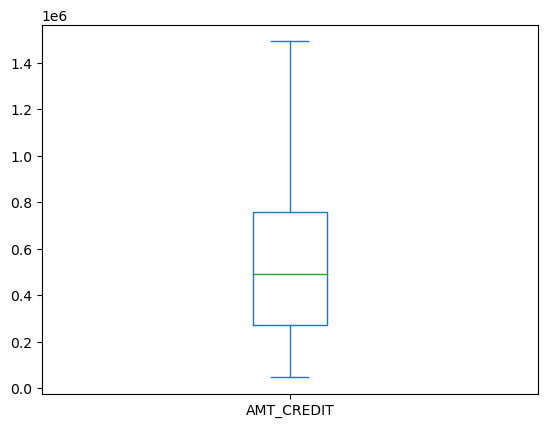

In [8]:
#find the IQR of AMT_CREDIT to get the desired range of data
#set the lower and higher acceptable limits where anything outside is considered an outlier
#update the dataframe to only the non outliers

Q1_CREDIT = df['AMT_CREDIT'].quantile(0.25)
Q3_CREDIT = df['AMT_CREDIT'].quantile(0.75)

IQR_CREDIT = Q3_CREDIT - Q1_CREDIT

below_CREDIT = Q1_CREDIT - 1.35 * IQR_CREDIT
above_CREDIT = Q3_CREDIT + 1.35 * IQR_CREDIT

df = df.loc[(df['AMT_CREDIT'] >= below_CREDIT) & (df['AMT_CREDIT'] <= above_CREDIT)] 
df['AMT_CREDIT'].plot(kind='box')

<Axes: >

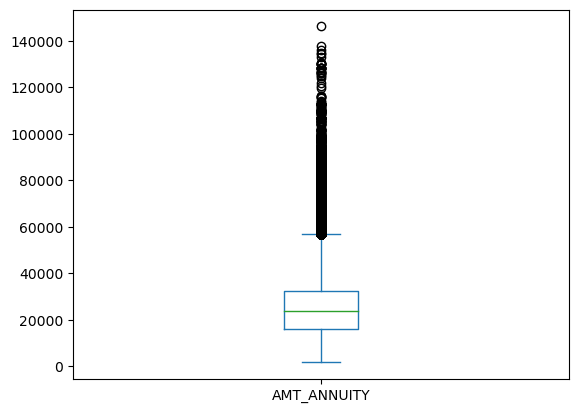

In [9]:
#use a box plot for AMT_ANNUITY to get a better view of outliers 
df['AMT_ANNUITY'].plot(kind='box')

<Axes: >

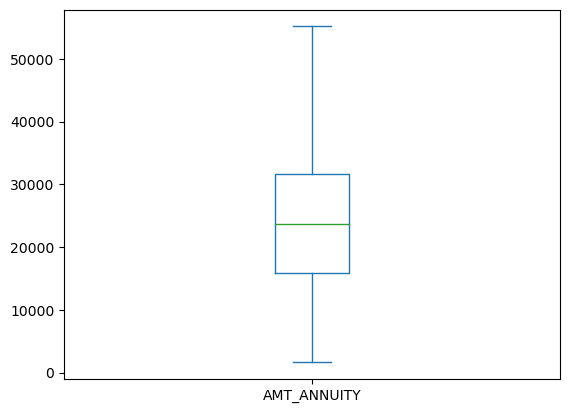

In [10]:
#find the IQR of AMT_ANNUITY to get the desired range of data
#set the lower and higher acceptable limits where anything outside is considered an outlier
#update the dataframe to only the non outliers

Q1_ANNUITY = df['AMT_ANNUITY'].quantile(0.25)
Q3_ANNUITY = df['AMT_ANNUITY'].quantile(0.75)

IQR_ANNUITY = Q3_ANNUITY - Q1_ANNUITY

below_ANNUITY = Q1_ANNUITY - 1.4 * IQR_ANNUITY
above_ANNUITY = Q3_ANNUITY + 1.4 * IQR_ANNUITY

df = df.loc[(df['AMT_ANNUITY'] >= below_ANNUITY) & (df['AMT_ANNUITY'] <= above_ANNUITY)] 
df['AMT_ANNUITY'].plot(kind='box')

<Axes: >

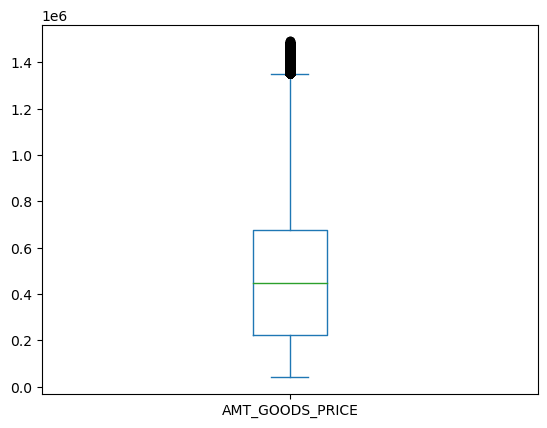

In [11]:
#use a box plot for AMT_GOODS_PRICE to get a better view of outliers 
df['AMT_GOODS_PRICE'].plot(kind='box')

<Axes: >

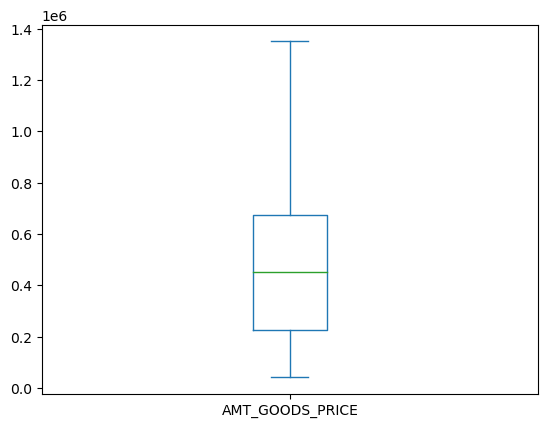

In [12]:
#find the IQR of AMT_GOODS_PRICE to get the desired range of data
#set the lower and higher acceptable limits where anything outside is considered an outlier
#update the dataframe to only the non outliers

Q1_GOODS = df['AMT_GOODS_PRICE'].quantile(0.25)
Q3_GOODS = df['AMT_GOODS_PRICE'].quantile(0.75)

IQR_GOODS = Q3_GOODS - Q1_GOODS

below_GOODS = Q1_GOODS - 1.5 * IQR_GOODS
above_GOODS = Q3_GOODS + 1.5 * IQR_GOODS

df = df.loc[(df['AMT_GOODS_PRICE'] >= below_GOODS) & (df['AMT_GOODS_PRICE'] <= above_GOODS)] 
df['AMT_GOODS_PRICE'].plot(kind='box')

<Axes: >

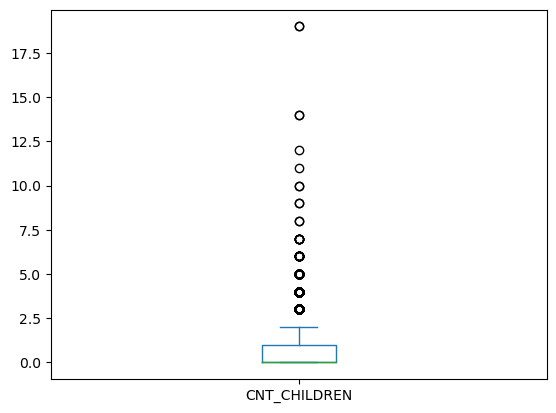

In [13]:
#use a box plot for CNT_CHILDREN to get a better view of outliers 
df['CNT_CHILDREN'].plot(kind='box')

<Axes: >

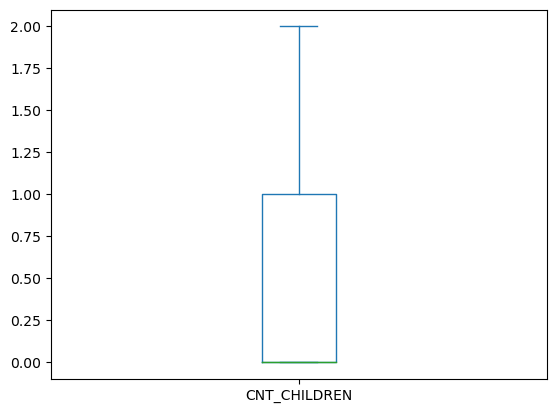

In [14]:
#find the IQR of CNT_CHILDREN to get the desired range of data
#set the lower and higher acceptable limits where anything outside is considered an outlier
#update the dataframe to only the non outliers

Q1_CHILDREN = df['CNT_CHILDREN'].quantile(0.25)
Q3_CHILDREN = df['CNT_CHILDREN'].quantile(0.75)

IQR_CHILDREN = Q3_CHILDREN - Q1_CHILDREN

below_CHILDREN = Q1_CHILDREN - 1.95 * IQR_CHILDREN
above_CHILDREN = Q3_CHILDREN + 1.95 * IQR_CHILDREN

df = df.loc[(df['CNT_CHILDREN'] >= below_CHILDREN) & (df['CNT_CHILDREN'] <= above_CHILDREN)] 
df['CNT_CHILDREN'].plot(kind='box')

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>],
       [<Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>,
        <Axes: title={'center': 'REG_REGION_NOT_WORK_REGION'}>,
    

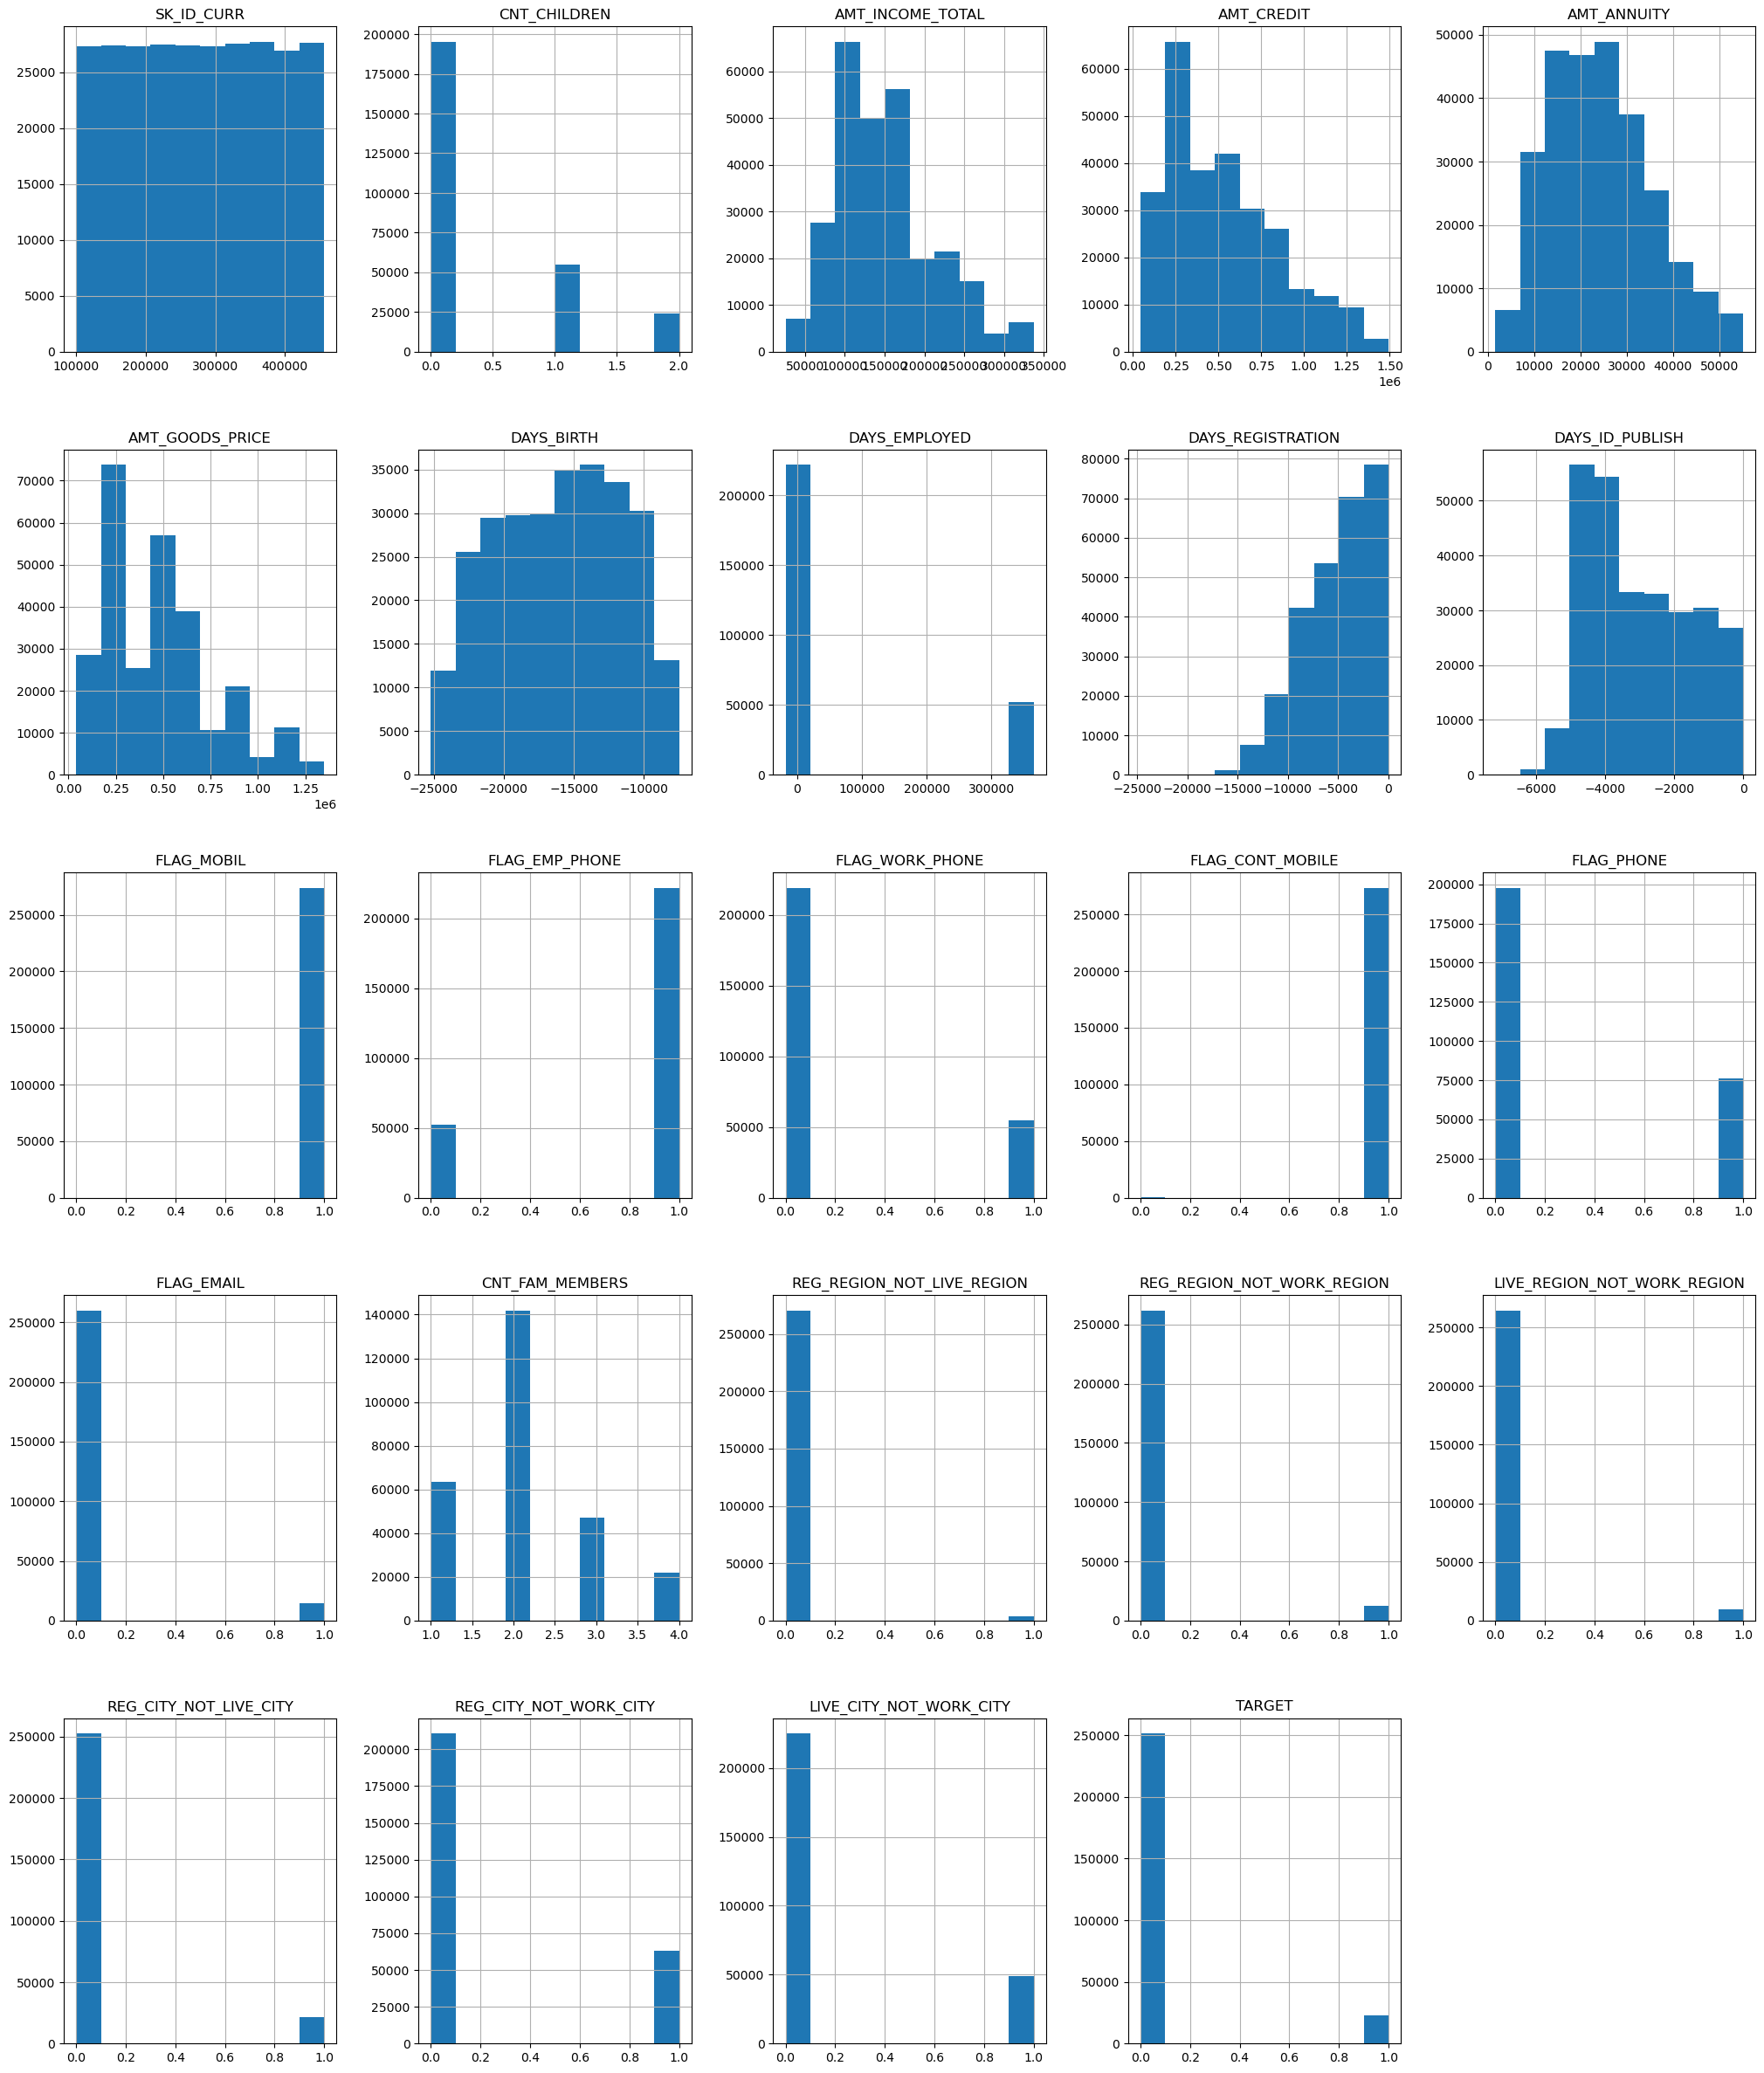

In [15]:
#look at the histogram again to see the changes in distribution
df.hist(figsize=(25,30))

In [16]:
#look at the different gender categories and drop the outliers (XNA)
print(df['CODE_GENDER'].value_counts(),'\n')

df = df.drop(df[df['CODE_GENDER']== 'XNA'].index.values)
print(df['CODE_GENDER'].value_counts())

CODE_GENDER
F      183491
M       90372
XNA         4
Name: count, dtype: int64 

CODE_GENDER
F    183491
M     90372
Name: count, dtype: int64


In [17]:
#look at the different family status categories and drop the outliers (Unknown)
print(df['NAME_FAMILY_STATUS'].value_counts(),'\n')

df = df.drop(df[df['NAME_FAMILY_STATUS']== 'Unknown'].index.values)
print(df['NAME_FAMILY_STATUS'].value_counts())

NAME_FAMILY_STATUS
Married                 171011
Single / not married     42077
Civil marriage           27325
Separated                18065
Widow                    15384
Unknown                      1
Name: count, dtype: int64 

NAME_FAMILY_STATUS
Married                 171011
Single / not married     42077
Civil marriage           27325
Separated                18065
Widow                    15384
Name: count, dtype: int64


## Who are our clients?

In [18]:
#find the sum of AMT_CREDIT to get how much (total) the company has out in loans 
loan = df['AMT_CREDIT'].sum()
print('total out in loans:   ${:,.2f}'.format(loan))

#find the sum of AMT_CREDIT where TARGET = 1 to get how much are in default/late
df_default = df.loc[df['TARGET'] == 1] 
default = df_default['AMT_CREDIT'].sum()
print('total in default/late: ${:,.2f}'.format(default))

#divide the total in default with the total in loans to get the percentage that is in default/late
print('percentage of default: {:.3f}%'.format((default/loan)*100))

total out in loans:   $145,613,369,110.50
total in default/late: $11,819,345,782.50
percentage of default: 8.117%


In [19]:
#find the amount of clients that are default/late (TARGET = 1)
df_target = df.groupby(['TARGET']).size()
df_target

TARGET
0    251088
1     22774
dtype: int64

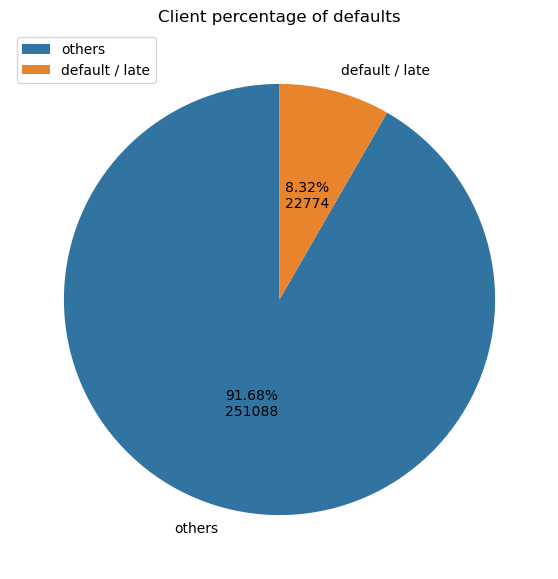

In [20]:
#graphically show the percent of clients that are default/late
#create a function to show the percentage and count
def autopct_format(values):
    return '{:1.2f}%\n{:.0f}'.format(values, df['TARGET'].count()*values/100.0)
    
df_target.plot(kind = 'pie', autopct = autopct_format, 
               title = 'Client percentage of defaults',
               figsize = (7,7), 
               startangle = 90, 
               counterclock = True, 
               pctdistance = 0.5,
               labels = ['others','default / late'], 
               colors = ['#3274a1','#e8842c'])

plt.legend(['others','default / late'], loc = 'upper left')

In [21]:
#find the count of clients based on their family status
df_family = df.groupby(['NAME_FAMILY_STATUS'], as_index = False).size()
df_family

,NAME_FAMILY_STATUS,size
0,Civil marriage,27325
1,Married,171011
2,Separated,18065
3,Single / not married,42077
4,Widow,15384


[Text(0.5, 0, 'Family Status'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Family status of clients')]

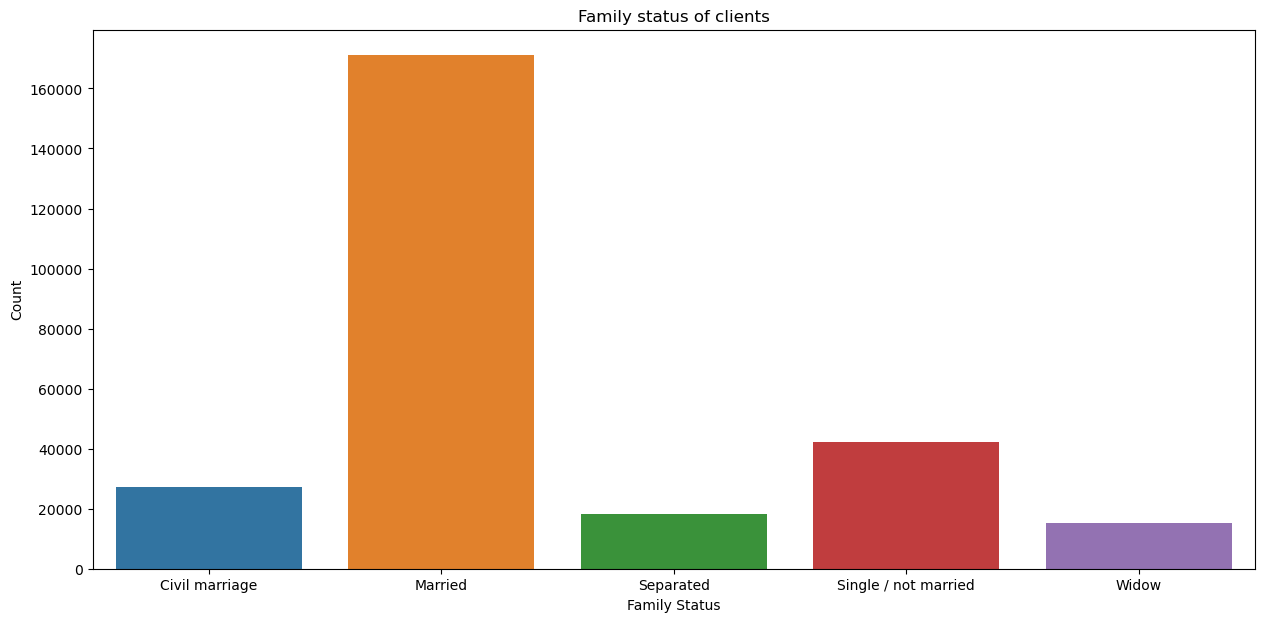

In [22]:
#graphically show the breakdown of clients' family status
plt.rcParams['figure.figsize'] = (15,7)
family = sb.barplot(x = 'NAME_FAMILY_STATUS', 
                    y = 'size',
                    data = df_family)

family.set(xlabel = 'Family Status', 
           ylabel = 'Count', 
           title = 'Family status of clients')

#the graph shows that majority of the clients are married

In [23]:
#find the age of the clients by taking the absoulte value of the DAYS_BIRTH column and dividing it by 365 to convert to years
#create bins for the ages of clients and label them accordingly
#find the count of clients based on their age
df['AGE'] = df['DAYS_BIRTH'].abs()/365
df['AGEBIN'] = pd.cut(df['AGE'], bins = [20, 30, 40, 50, 60, 70], labels = ['20-29','30-39','40-49','50-59','60+'])

df_age = df.groupby(['AGEBIN'],as_index = False)['AGE'].size()
df_age

,AGEBIN,size
0,20-29,41882
1,30-39,71056
2,40-49,66498
3,50-59,61016
4,60+,33410


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Age of clients')]

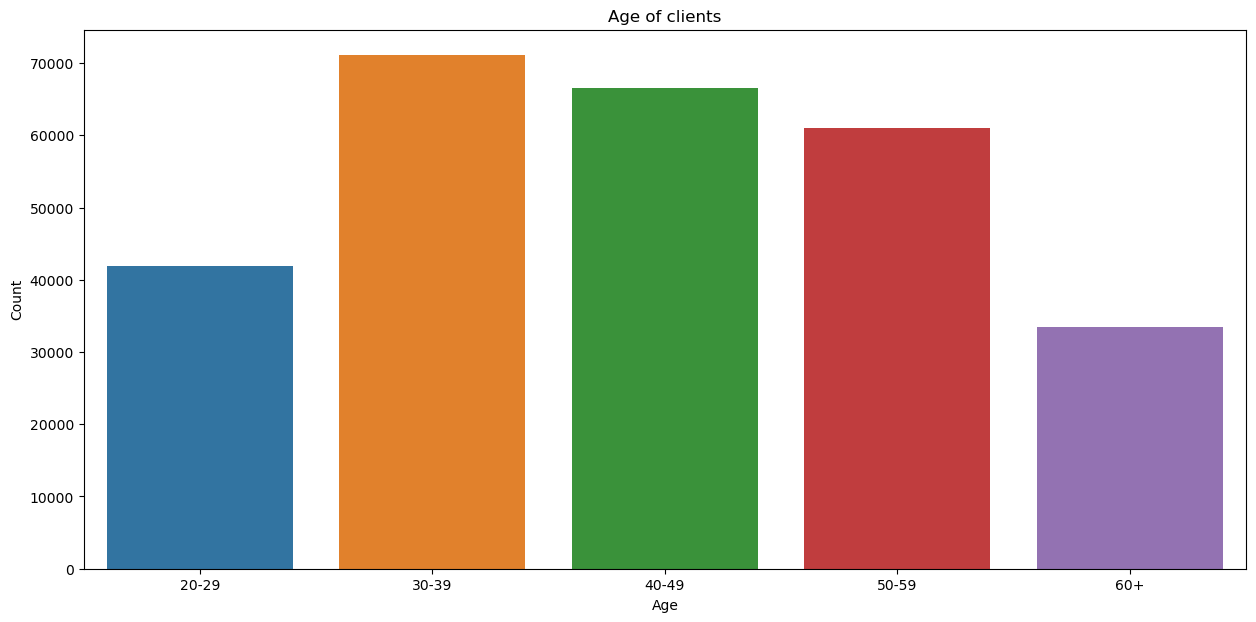

In [24]:
#graphically show the breakdown of clients' age
plt.rcParams['figure.figsize'] = (15,7)
client_age = sb.barplot(x = 'AGEBIN', 
                        y = 'size',
                        data = df_age)

client_age.set(xlabel = 'Age', 
               ylabel = 'Count', 
               title = 'Age of clients')

#the graph shows that majority of the clients are between 30-59 years old, with 30-39 being the most common range

In [25]:
#find the contract type based on clients' gender
df_gender = df.groupby(['NAME_CONTRACT_TYPE','CODE_GENDER'], as_index = False)['CODE_GENDER'].size()
df_gender

,NAME_CONTRACT_TYPE,CODE_GENDER,size
0,Cash loans,F,164943
1,Cash loans,M,81942
2,Revolving loans,F,18547
3,Revolving loans,M,8430


[Text(0.5, 0, 'Contract type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Contract type by gender')]

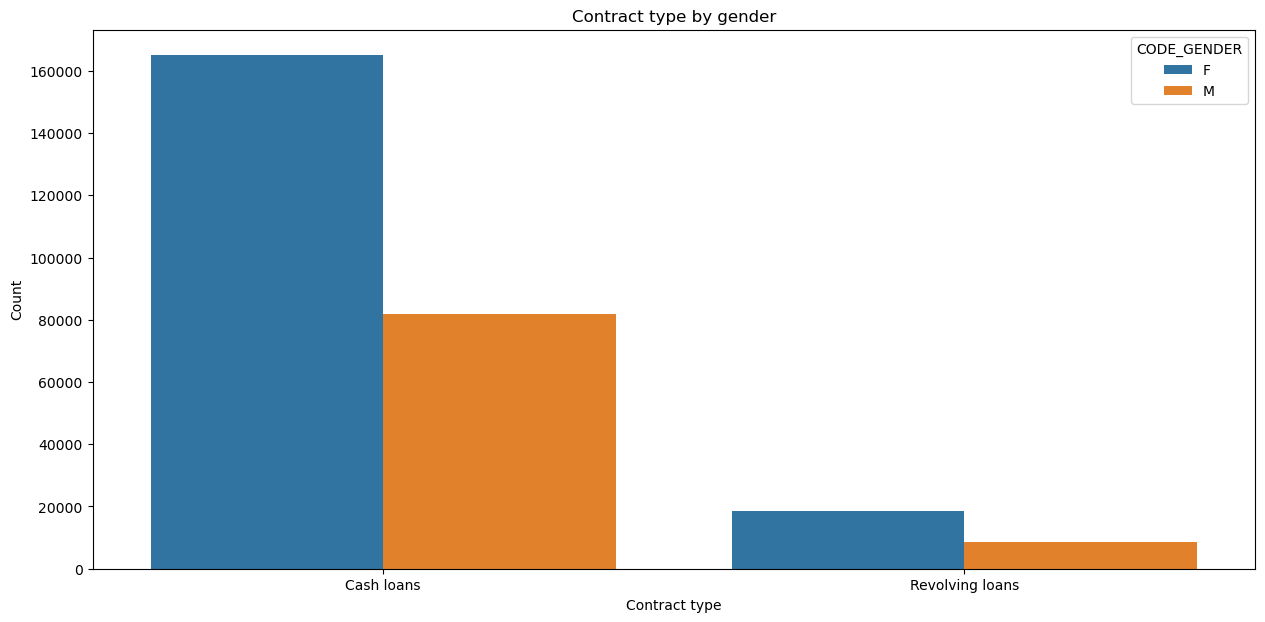

In [26]:
#graphically show the breakdown of the contract type based on clients' gender
plt.rcParams['figure.figsize'] = (15,7)
contract_by_gender = sb.barplot(x = 'NAME_CONTRACT_TYPE', 
                                y = 'size', 
                                hue = 'CODE_GENDER', 
                                data = df_gender)

contract_by_gender.set(xlabel = 'Contract type', 
                       ylabel = 'Count', 
                       title = 'Contract type by gender')

#the graph shows that females with a cash loan is most common

## Who defaults or has problems replaying loans? 

In [27]:
#find the contract type based on if the clients default or not
df_dcontract = df.groupby(['NAME_CONTRACT_TYPE','TARGET'], as_index = False)['TARGET'].size()

df_dcontract['target_type'] = 'others'
df_dcontract.loc[df_dcontract['TARGET'] == 1, 'target_type'] = 'default / late'
df_dcontract

,NAME_CONTRACT_TYPE,TARGET,size,target_type
0,Cash loans,0,225647,others
1,Cash loans,1,21238,default / late
2,Revolving loans,0,25441,others
3,Revolving loans,1,1536,default / late


[Text(0.5, 0, 'Contract type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Default by contract type')]

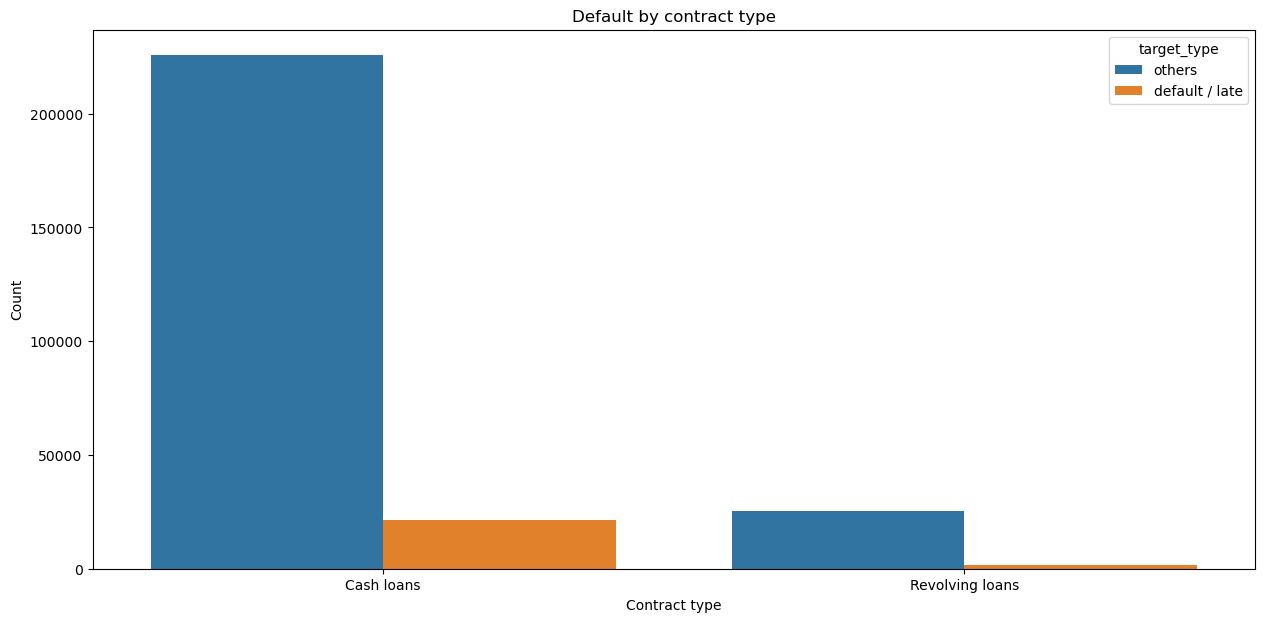

In [28]:
#graphically show the breakdown of the contract type of clients that default
plt.rcParams['figure.figsize'] = (15,7)
contract_default = sb.barplot(x = 'NAME_CONTRACT_TYPE',
                              y = 'size',
                              hue = 'target_type',
                              data = df_dcontract)

contract_default.set(xlabel = 'Contract type', 
                     ylabel = 'Count', 
                     title = 'Default by contract type')

#the graph shows that cash loans are more likely to be defaults compared to revolving loans

In [29]:
#find the education type based on clients that default
df_deducation = df_default.groupby(['NAME_EDUCATION_TYPE'], as_index = False)['TARGET'].size()
df_deducation

,NAME_EDUCATION_TYPE,size
0,Higher education,3422
1,Incomplete higher,799
2,Lower secondary,394
3,Secondary / secondary special,18159


[Text(0.5, 0, 'Education Status'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Default by education type')]

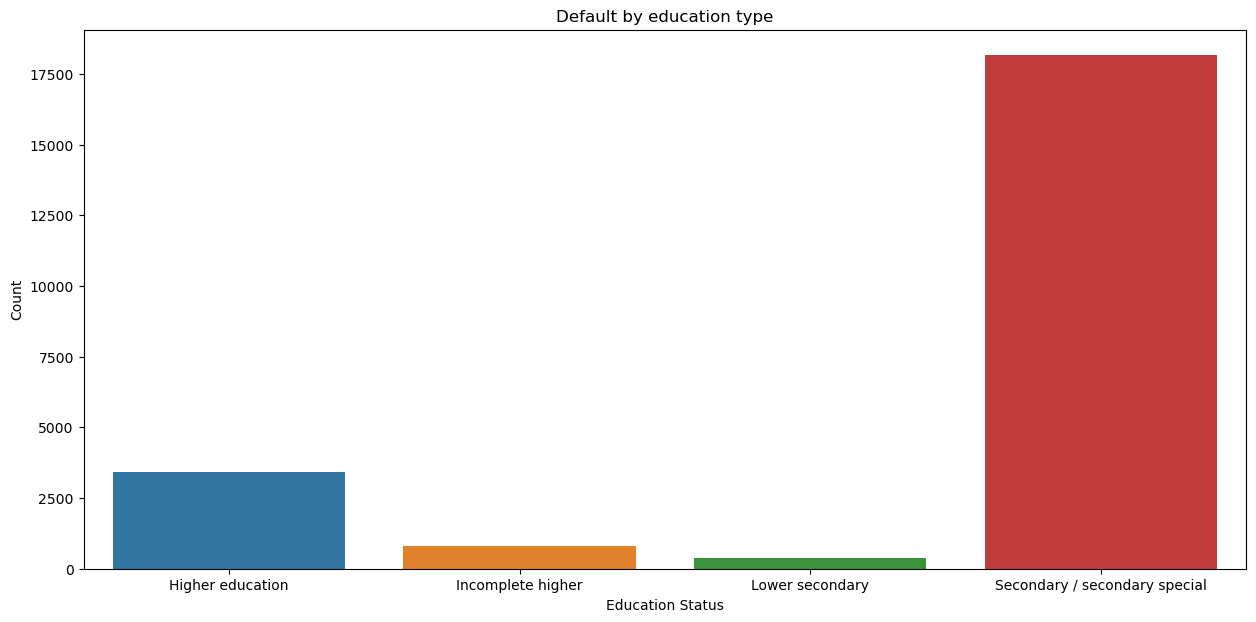

In [30]:
#graphically show the breakdown of the education type of clients that default
plt.rcParams['figure.figsize'] = (15,7)
education_default = sb.barplot(x = 'NAME_EDUCATION_TYPE', 
                               y = 'size', 
                               data = df_deducation)

education_default.set(xlabel = 'Education Status', 
                      ylabel = 'Count', 
                      title = 'Default by education type')

#the graph shows that clients with Secondary / secondary special education is more likely to default

In [31]:
#find the family status based on if the clients default or not
df_dfamily = df.groupby(['NAME_FAMILY_STATUS','TARGET'], as_index = False)['TARGET'].size()

df_dfamily['target_type'] = 'others'
df_dfamily.loc[df_dfamily['TARGET'] == 1, 'target_type'] = 'default / late'
df_dfamily

,NAME_FAMILY_STATUS,TARGET,size,target_type
0,Civil marriage,0,24560,others
1,Civil marriage,1,2765,default / late
2,Married,0,157608,others
3,Married,1,13403,default / late
4,Separated,0,16572,others
5,Separated,1,1493,default / late
6,Single / not married,0,37856,others
7,Single / not married,1,4221,default / late
8,Widow,0,14492,others
9,Widow,1,892,default / late


[Text(0.5, 0, 'Family Status'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Default by family status')]

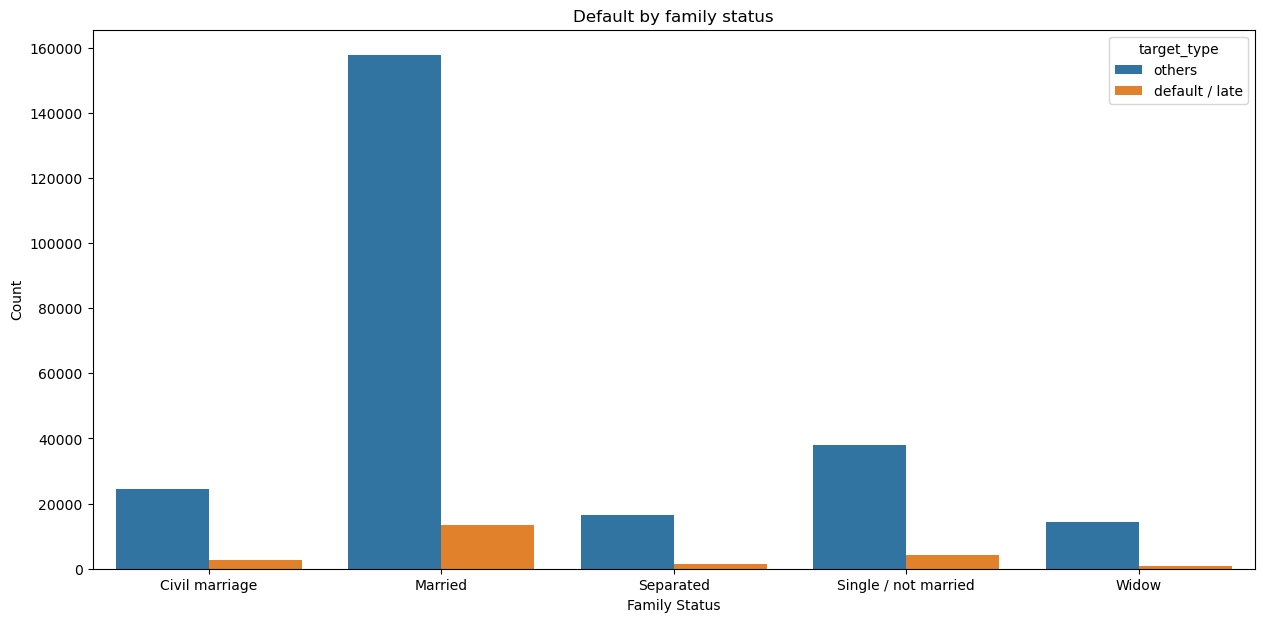

In [32]:
#graphically show the breakdown of the family status of clients that default
plt.rcParams['figure.figsize'] = (15,7)
family_default = sb.barplot(x = 'NAME_FAMILY_STATUS', 
                            y = 'size', 
                            hue = 'target_type',
                            data = df_dfamily)

family_default.set(xlabel = 'Family Status', 
                   ylabel = 'Count', 
                   title = 'Default by family status')

#the graph shows that clients that are married are more likely to default

## Regression analysis

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#use dummies to change the columns with string data
df = pd.get_dummies(df, columns = ['NAME_CONTRACT_TYPE', 
                                   'CODE_GENDER',
                                   'FLAG_OWN_CAR',
                                   'FLAG_OWN_REALTY',
                                   'NAME_TYPE_SUITE',
                                   'NAME_INCOME_TYPE',
                                   'NAME_EDUCATION_TYPE',
                                   'NAME_FAMILY_STATUS',
                                   'NAME_HOUSING_TYPE',
                                   'ORGANIZATION_TYPE','AGEBIN'])

In [34]:
#run a logistic regresstion with df
lr = LogisticRegression()
X = df
X = X.drop(['TARGET'], axis = 1)
y = df['TARGET']

In [35]:
#train the model using the dataset and get the score
lr.fit(X,y)
lr.score(X,y)

0.9168413288444545

In [36]:
#predict using the dataset
pred = lr.predict(X)

In [37]:
#balance the data
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y, pred)

0.5

In [38]:
#rerun the logistic regression balanced
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs')
lr.fit(X,y)
lr.score(X,y)

0.5950442193513521

In [39]:
#predict using the dataset
pred = lr.predict(X)

In [40]:
#confusion matrix
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,pred),  
    index = ['actual:yes', 'actual:no'], 
    columns = ['pred:yes', 'pred:no'])
print(cmtx)

            pred:yes  pred:no
actual:yes    150268   100820
actual:no      10082    12692
